In [1]:
# Apple - Stock market abbreviation: AAPL
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Pull in Apple stock data: 'full' returns the full-length time series of 20+ years of historical data
AAPL_data, metadata=ts.get_daily('AAPL',outputsize='full')
AAPL_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5226.000000,5226.000000,5226.000000,5226.000000,5.226000e+03
mean,175.919433,177.871639,173.834537,175.907279,2.375806e+07
std,159.879863,161.198075,158.349729,159.807313,1.836599e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,59.230000,60.660000,58.355000,59.615750,9.757075e+06
50%,123.265000,125.050000,121.375000,123.265000,2.041075e+07
75%,221.732500,224.112500,219.292500,222.242425,3.222546e+07
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08


In [3]:
# Create a csv file of the data
AAPL_data.to_csv('AAPL_data.csv')

In [4]:
# Sort by date
AAPL_data['date'] = AAPL_data.index

In [5]:
# Show our data
AAPL_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-07,452.82,454.7000,441.17,444.45,49511403.0,2020-08-07
2020-08-06,441.62,457.6500,439.19,455.61,50607225.0,2020-08-06
2020-08-05,437.51,441.5700,435.59,440.25,30497988.0,2020-08-05
2020-08-04,436.53,443.1600,433.55,438.66,43198092.0,2020-08-04
2020-08-03,432.80,446.5457,431.57,435.75,77037847.0,2020-08-03
...,...,...,...,...,...,...
1999-11-05,84.62,88.3700,84.00,88.31,3721500.0,1999-11-05
1999-11-04,82.06,85.3700,80.62,83.62,3384700.0,1999-11-04
1999-11-03,81.62,83.2500,81.00,81.50,2932700.0,1999-11-03


In [7]:
# Read in our stock market data to use for training
AAPL_training_complete = pd.read_csv('//project_3/AAPL_data.csv')

In [8]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
AAPL_training_processed = AAPL_training_complete.iloc[:, 1:2].values

In [9]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

AAPL_training_scaled = scaler.fit_transform(AAPL_training_processed)

In [10]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 5226):
    features_set.append(AAPL_training_scaled[i-60:i, 0])
    labels.append(AAPL_training_scaled[i, 0])

In [11]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [12]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [13]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [14]:
# Instantiate the sequential class
model = Sequential()

In [15]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [17]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [18]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [19]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5166 samples
Epoch 1/50
5166/5166 [==============================] - 26s 5ms/sample - loss: 0.0066
Epoch 2/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0024
Epoch 3/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0023
Epoch 4/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0019
Epoch 5/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0017
Epoch 6/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0016
Epoch 7/50
5166/5166 [==============================] - 23s 5ms/sample - loss: 0.0014
Epoch 8/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0016
Epoch 9/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0014
Epoch 10/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0013
Epoch 11/50
5166/5166 [

In [34]:
# Further training of the model
model.fit(features_set, labels, epochs = 50, batch_size = 32)

Train on 5166 samples
Epoch 1/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.5228e-04
Epoch 2/50
5166/5166 [==============================] - 26s 5ms/sample - loss: 6.5634e-04
Epoch 3/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 7.9667e-04
Epoch 4/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 6.8529e-04
Epoch 5/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 6.7346e-04
Epoch 6/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 6.4613e-04
Epoch 7/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 6.5900e-04
Epoch 8/50
5166/5166 [==============================] - 26s 5ms/sample - loss: 6.2093e-04
Epoch 9/50
5166/5166 [==============================] - 25s 5ms/sample - loss: 6.3922e-04
Epoch 10/50
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.4222e-04
Epoch 11/50
5166/5166 [==============================] - 24s 5ms/sample - los

In [21]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
AAPL_data2, metadata=ts.get_daily('AAPL',outputsize='compact')
AAPL_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,325.188185,330.069679,321.217290,326.048500,4.015550e+07
std,53.984652,54.278490,53.960713,54.383836,1.588973e+07
min,228.080000,228.500000,212.610000,224.370000,2.019780e+07
25%,282.250000,286.205000,278.162500,283.120000,2.914918e+07
50%,318.955000,322.895000,316.510000,319.060000,3.531960e+07
75%,365.802500,372.005000,363.707500,367.512500,4.830402e+07
max,452.820000,457.650000,441.170000,455.610000,1.004233e+08


In [22]:
AAPL_data2.to_csv('AAPL_data2.csv')

In [23]:
AAPL_data2['date'] = AAPL_data2.index

In [24]:
AAPL_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-07,452.82,454.7000,441.17,444.45,49511403.0,2020-08-07
2020-08-06,441.62,457.6500,439.19,455.61,50607225.0,2020-08-06
2020-08-05,437.51,441.5700,435.59,440.25,30497988.0,2020-08-05
2020-08-04,436.53,443.1600,433.55,438.66,43198092.0,2020-08-04
2020-08-03,432.80,446.5457,431.57,435.75,77037847.0,2020-08-03
...,...,...,...,...,...,...
2020-03-24,236.36,247.6900,234.30,246.88,71882800.0,2020-03-24
2020-03-23,228.08,228.5000,212.61,224.37,84188200.0,2020-03-23
2020-03-20,247.18,251.8300,228.00,229.24,100423300.0,2020-03-20


In [25]:
# Read in our testing data
AAPL_testing_complete = pd.read_csv('//project_3/AAPL_data2.csv')
AAPL_testing_processed = AAPL_testing_complete.iloc[:, 1:2].values

In [26]:
# Concatenate our training data and testing data
AAPL_total = pd.concat((AAPL_training_complete['1. open'], AAPL_testing_complete['1. open']), axis=0)

In [27]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = AAPL_total[len(AAPL_total) - len(AAPL_testing_complete) - 60:].values

In [28]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [42]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [43]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [44]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [45]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

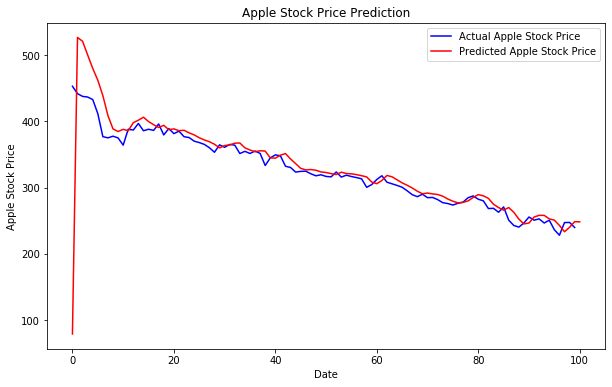

In [46]:
# Plot the results - model trained with 50 epochs 
plt.figure(figsize=(10,6))
plt.plot(AAPL_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [35]:
test_inputs = AAPL_total[len(AAPL_total) - len(AAPL_testing_complete) - 60:].values

In [36]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [47]:
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [48]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [49]:
predictions = model.predict(test_features)

In [50]:
predictions = scaler.inverse_transform(predictions)

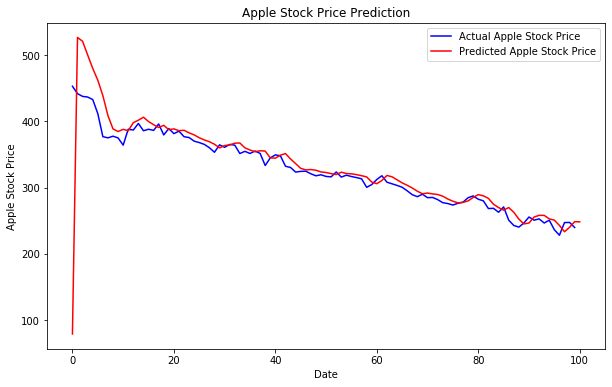

In [58]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(AAPL_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [62]:
# Save the model - can be used later
model.save("Apple_model_trained.h5")